
# Retail Sales EDA Project

**Goal:** Perform exploratory data analysis (EDA) on a retail sales dataset to uncover patterns, trends, and insights for business recommendations.


In [1]:

# Install necessary packages (for Colab users)
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Data Loading
Upload your `retail_sales_dataset.csv` file when prompted below.


In [1]:

# ...existing code...
import pandas as pd

# Directly read the CSV if it's in your working directory
df = pd.read_csv('retail_sales_dataset.csv')
print(df.head())
# ...existing code...


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  



## Data Cleaning & Preparation
Inspect data types, handle missing values, and convert columns.


In [3]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Handle missing values if necessary (here we drop rows with any missing)
df = df.dropna()

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Missing values per column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



## Descriptive Statistics
Mean, Median, Mode, Standard Deviation for numeric columns.


In [4]:
describe = df.describe(include='all')
mode = df.mode().iloc[0]
std = df.std(numeric_only=True)
print('Descriptive Summary:\n', describe)
print('\nMode:\n', mode)
print('\nStandard Deviation:\n', std)

Descriptive Summary:
         Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN    CUST1000  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity  Pri


## Time Series Analysis
Analyze sales trends over time (daily and monthly).


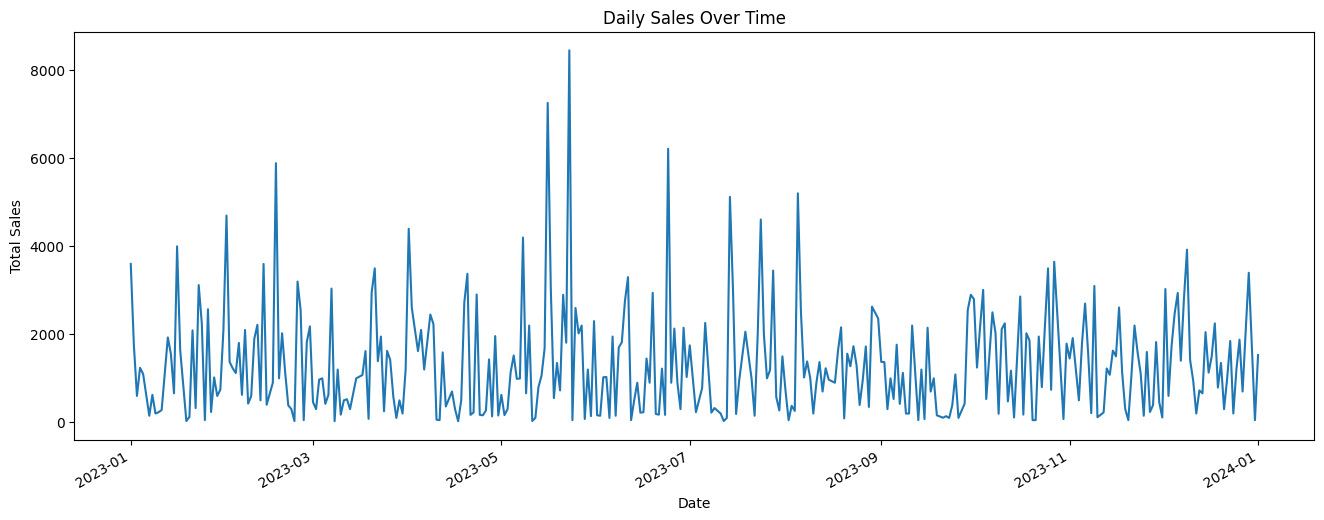

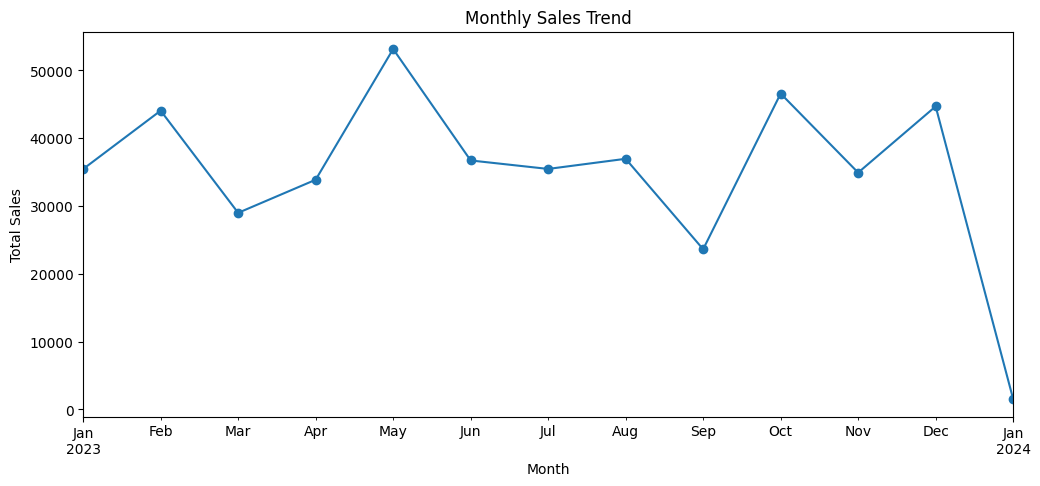

In [5]:

# Daily sales
daily_sales = df.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(16,6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

# Monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()



## Customer Demographics & Product Analysis
Demographic distribution and product category insights.


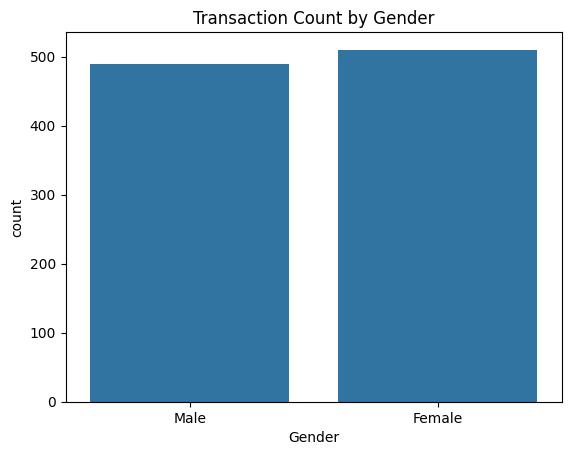

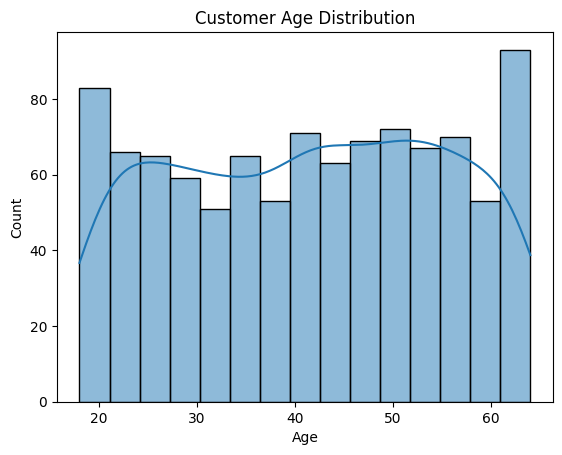

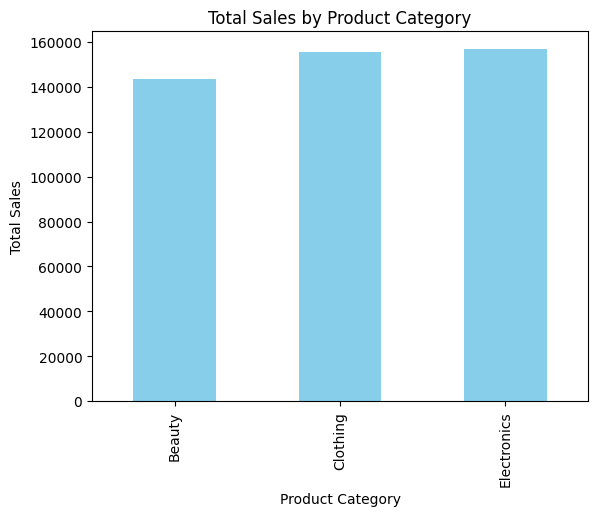

In [6]:

# Gender Analysis
sns.countplot(data=df, x='Gender')
plt.title('Transaction Count by Gender')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Product category sales
cat_sales = df.groupby('Product Category')['Total Amount'].sum()
cat_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()



## Purchasing Behavior & Heatmap Analysis
Top customers, average spend, and relationship heatmaps.


Top 10 Customers by Total Spend:
Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64
Average Order Value by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


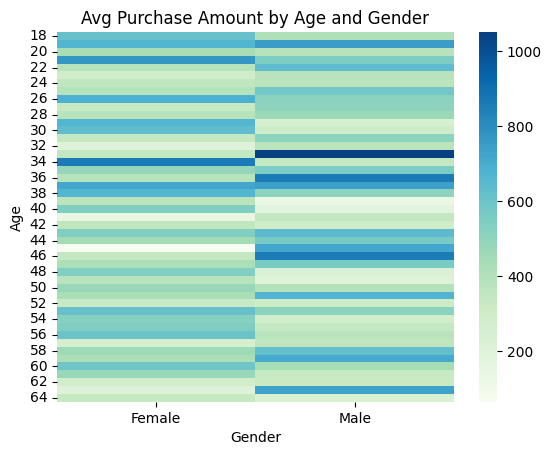

In [7]:

# Top customers
print('Top 10 Customers by Total Spend:')
print(df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10))

# Average order value by gender
print('Average Order Value by Gender:')
print(df.groupby('Gender')['Total Amount'].mean())

# Age vs Gender Heatmap
pivot = df.pivot_table(values='Total Amount', index='Age', columns='Gender', aggfunc='mean')
sns.heatmap(pivot, cmap='GnBu')
plt.title('Avg Purchase Amount by Age and Gender')
plt.show()



## Recommendations

- Focus marketing efforts on age groups and genders with the highest average spend.
- Stock more of the best-selling product categories, as revealed above.
- Consider promotions during low-sales months or to underrepresented age/gender groups.
- Target top customers with loyalty/reward programs to retain high-value buyers.
- Further segment customer/product data for potential cross-selling strategies.


